**References**:
* Graph Embeddings — The Summary https://towardsdatascience.com/graph-embeddings-the-summary-cc6075aba007
* DeepWalk paper - https://arxiv.org/pdf/1403.6652.pdf
* DeepWalk implementation - https://github.com/phanein/deepwalk
* SkipGram - http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/
* Hierarchial softmax - https://www.youtube.com/watch?v=B95LTf2rVWM
* Introduction to GNN - https://towardsdatascience.com/a-gentle-introduction-to-graph-neural-network-basics-deepwalk-and-graphsage-db5d540d50b3

**Installation**:
1. clone  https://github.com/phanein/deepwalk

2. cd deepwalk
3. pip install -r requirements.txt (optional)
4. python setup.py install

Requirements:
* Numpy
* Scipy



**Example usage:**

deepwalk --input example_graphs/karate.adjlist --output karate.embeddings

karate.adjlist has adjancency list format:


In [3]:


karate_f = 'C:/Users/Hp/Downloads/deepwalk/example_graphs/karate.adjlist'

with open(karate_f, 'r') as f:
    print(f.read())


1 2 3 4 5 6 7 8 9 11 12 13 14 18 20 22 32
2 1 3 4 8 14 18 20 22 31
3 1 2 4 8 9 10 14 28 29 33
4 1 2 3 8 13 14
5 1 7 11
6 1 7 11 17
7 1 5 6 17
8 1 2 3 4
9 1 3 31 33 34
10 3 34
11 1 5 6
12 1
13 1 4
14 1 2 3 4 34
15 33 34
16 33 34
17 6 7
18 1 2
19 33 34
20 1 2 34
21 33 34
22 1 2
23 33 34
24 26 28 30 33 34
25 26 28 32
26 24 25 32
27 30 34
28 3 24 25 34
29 3 32 34
30 24 27 33 34
31 2 9 33 34
32 1 25 26 29 33 34
33 3 9 15 16 19 21 23 24 30 31 32 34
34 9 10 14 15 16 19 20 21 23 24 27 28 29 30 31 32 33



It means node __1__ is linked to 2 3 4 5 6 7 8 9 11 12 13 14 18 20 22 32,    
  node **2** is linked to 1 3 4 8 14 18 20 22 31, etc.
  
  Lets show our graph

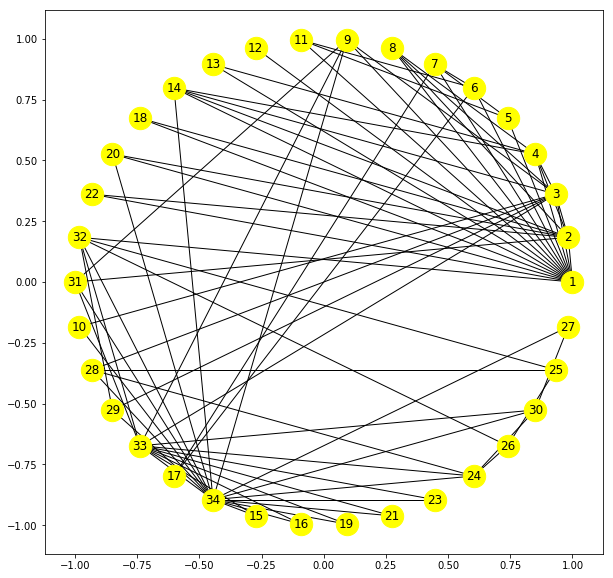

In [5]:
import networkx as nx
import matplotlib.pyplot as plt


G=nx.read_adjlist(karate_f)

plt.rcParams["figure.figsize"] = (10,10)
nx.draw_networkx(G,pos = nx.shell_layout(G),font_size=12, node_size= 500, node_color = 'yellow')
plt.show()

From [wikipedia](https://en.wikipedia.org/wiki/Zachary%27s_karate_club) and [url](http://historicaldataninjas.com/karate-club-network/)

  Zachary's karate club is a social network of a university karate club, described in the paper "An Information Flow Model for Conflict and Fission in Small Groups" by Wayne W. Zachary. __The network captures 34 members of a karate club, documenting links between pairs of members who interacted outside the club.__ During the study a conflict arose between the administrator (__node 34__) and instructor "Mr. Hi" (__node 1__), which led to the split of the club into two. Half of the members formed a new club around Mr. Hi; members from the other part found a new instructor or gave up karate.

![alt text](res/karate.jpg "Karate graph")

In [19]:
karate_emb_f = 'C:/Users/Hp/Downloads/deepwalk/karate.2d_embeddings'

emb_dict = {}

with open(karate_emb_f, 'r') as f:
    temp = f.readlines()

content = [x.strip() for x in temp] 
for row in content[1:]:
    row_t = row.split()
    emb_dict[row_t[0]]=(float(row_t[1]),float(row_t[2]))
print(emb_dict)

{'1': (1.2305617, -0.25490013), '34': (0.27377975, -1.3252246), '33': (0.24959943, -1.273467), '3': (0.6780117, -0.7990096), '2': (1.0129358, -0.47901335), '4': (1.0571, -0.45512837), '32': (0.33555427, -1.1821679), '14': (0.87757444, -0.6043603), '24': (0.04167222, -1.5522425), '9': (0.48417646, -1.017751), '8': (0.9769528, -0.5702081), '28': (0.27520487, -1.2363974), '6': (2.0522776, 0.13180198), '7': (1.8441018, -0.012617982), '31': (0.43266094, -1.0450279), '30': (0.03171163, -1.6259094), '25': (0.09300206, -1.4481238), '29': (0.44833827, -1.0226718), '5': (1.8576318, 0.039161034), '11': (1.9280478, 0.07678883), '26': (0.028252808, -1.5971332), '20': (0.8838541, -0.6015411), '13': (1.0441735, -0.51097), '18': (1.198816, -0.3994854), '22': (1.1340133, -0.39149067), '17': (2.2233315, 0.21785235), '23': (0.17551501, -1.371741), '10': (0.42485967, -1.0952308), '15': (0.23012984, -1.3015996), '19': (0.23215713, -1.3679727), '16': (0.070649974, -1.4942169), '21': (0.25072676, -1.2891726)

In [57]:

color_map = []
blue_nodes = list(range(1,10))
blue_nodes.extend([11,12,13,14,17,18,20,22])

red_nodes = set(range(1,35))
red_nodes = list(red_nodes - set(blue_nodes))

for node in G:
    if int(node) in blue_nodes:
        color_map.append('blue')
    else: color_map.append('red')


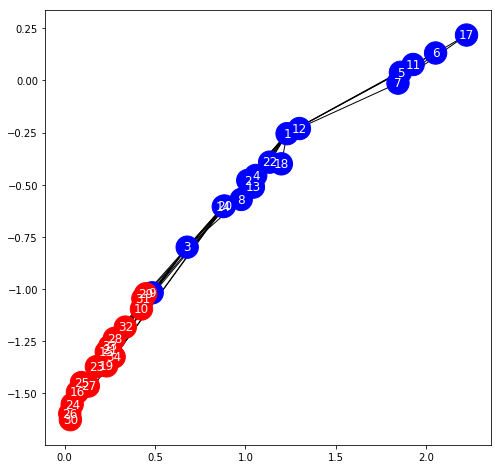

In [28]:
plt.rcParams["figure.figsize"] = (8,8)
nx.draw_networkx(G,emb_dict,font_size=12, node_size= 500, node_color = color_map, font_color = 'white' )
plt.savefig('res/emb2_karate.png')
plt.show()

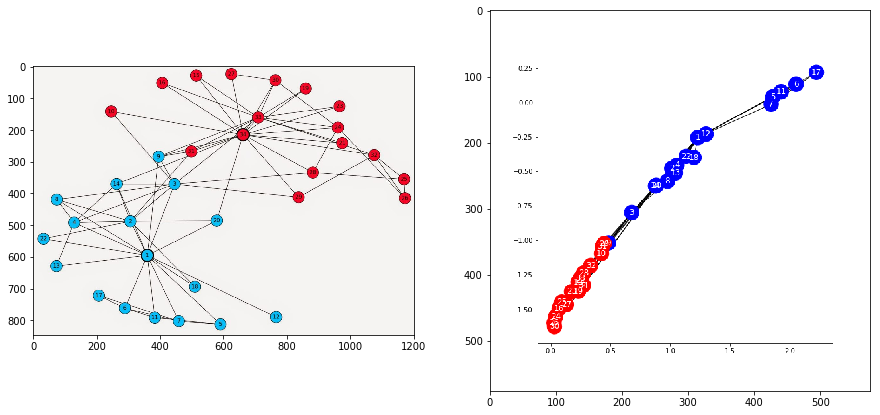

In [29]:
import cv2
import matplotlib.pyplot as plt

im1 = cv2.imread('res/karate.jpg')
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)

im2 = cv2.imread('res/emb2_karate.png')
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)
#im_resized = cv2.resize(im, (500, 500), interpolation=cv2.INTER_LINEAR)

plt.rcParams["figure.figsize"] = (15,15)
f, axarr = plt.subplots(1,2)
axarr[0].imshow(im1)
axarr[1].imshow(im2)
plt.show()

In [1]:
karate_emb_f = 'C:/Users/Hp/Downloads/deepwalk/karate.3d_embeddings'

emb_dict_3d = {}

with open(karate_emb_f, 'r') as f:
    temp = f.readlines()

content = [x.strip() for x in temp] 
for row in content[1:]:
    row_t = row.split()
    emb_dict_3d[row_t[0]]=(float(row_t[1]),float(row_t[2]),float(row_t[3]))
print(emb_dict_3d)

{'1': (1.2145667, -0.17752531, 0.4074096), '34': (0.60028523, -1.0354561, -0.654669), '33': (0.5680808, -0.97656775, -0.65651155), '3': (0.7536756, -0.9346074, 0.14323688), '2': (0.9731025, -0.8223185, 0.6636565), '4': (0.98608786, -0.86245626, 0.7392112), '32': (0.7796303, -0.46246007, -0.93749076), '14': (0.9315371, -0.6363499, 0.22242185), '24': (0.5433629, -0.93872344, -1.0860107), '9': (0.71414655, -0.7906069, -0.3743488), '8': (0.9521999, -0.89719933, 0.5973141), '28': (0.6671002, -0.7130736, -0.7924304), '6': (1.9732352, 0.67806613, 0.23844647), '7': (1.85327, 0.6567248, -0.113011084), '31': (0.6178949, -0.9952161, -0.2577853), '30': (0.51265794, -1.1016785, -1.0580549), '25': (0.67380154, -0.565827, -1.2532979), '29': (0.6803636, -0.8102105, -0.38479787), '5': (1.7937735, 0.45769238, 0.316324), '11': (1.8552804, 0.55318516, 0.26057458), '26': (0.6904426, -0.59549254, -1.4375304), '20': (0.93961716, -0.61792815, 0.21688694), '13': (1.0245118, -0.73768467, 0.5461695), '18': (1.18

In [38]:
def make_adj_dict(f_adjlist):
    
    adj_dict={}
    
    with open(f_adjlist, 'r') as f:
        temp = f.readlines()

    content = [x.strip() for x in temp] 
    for row in content:
        row_t = row.split()
        #print(row.split())
        adj_dict[row_t[0]]=row_t[1:]
    
    #print(adj_dict)
    return adj_dict

_=make_adj_dict(karate_f)



In [58]:
color_map = []
blue_nodes = list(range(1,10))
blue_nodes.extend([11,12,13,14,17,18,20,22])

red_nodes = set(range(1,35))
red_nodes = list(red_nodes - set(blue_nodes))

for node in range(1,35):
    if node in blue_nodes:
        color_map.append('blue')
    else: color_map.append('red')

<IPython.core.display.Javascript object>


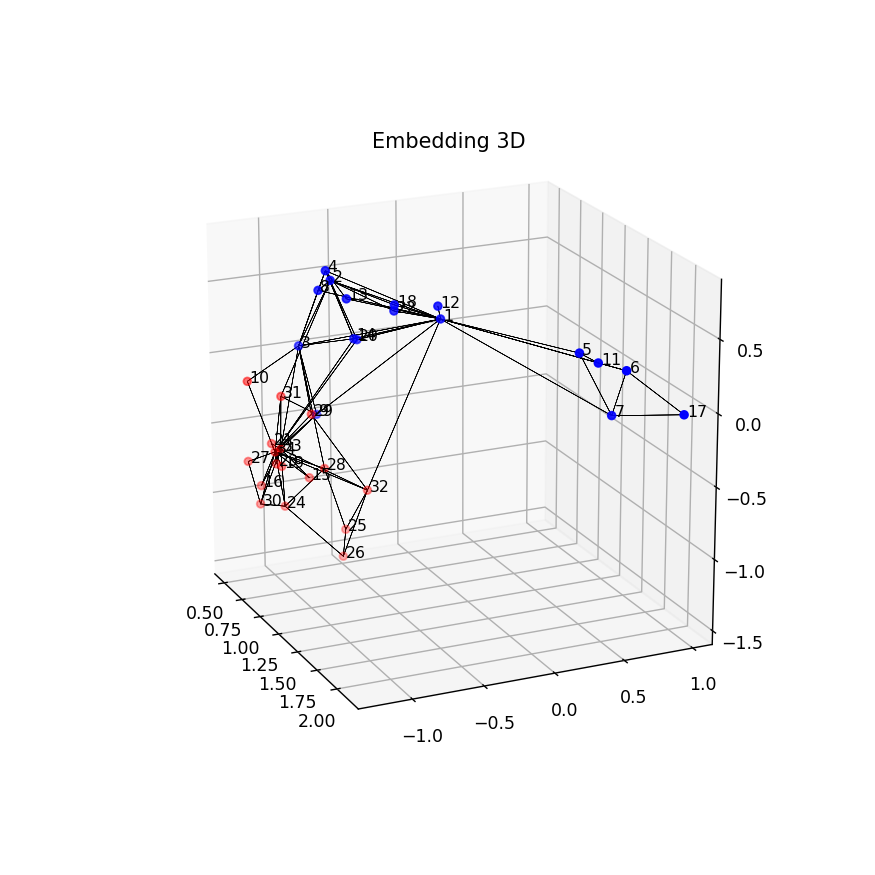

In [95]:
def plot3d(edgelist, embedding, title='', node_color='blue', edge_color='black'):
    
    
    adj = make_adj_dict(edgelist)
    
    data = embedding
    nodes = data.keys()
    nodes = sorted(nodes, key=lambda n : int(n))
    
    fig = plt.figure(0)
    ax = fig.add_subplot(111, projection='3d')
    
    # Plotting nodes from the embedding given their coordinates
    ax.scatter(
        [data[key][0] for key in nodes], 
        [data[key][1] for key in nodes], 
        [data[key][2] for key in nodes], 
        c=node_color
    )
    # Plotting labels
    for key in nodes:
        ax.text(data[key][0]+0.03,data[key][1],data[key][2],key,fontsize=9)
    
    # Plotting edges between adjacent nodes
    for node in adj:
        neighbors = adj[node]
        
        X, Y, Z = [data[node][0]], [data[node][1]], [data[node][2]]
        
        for neighbor in neighbors:
            X.append(data[neighbor][0])
            X.append(data[node][0])
            
            Y.append(data[neighbor][1])
            Y.append(data[node][1])
            
            Z.append(data[neighbor][2])
            Z.append(data[node][2])
        
        ax.plot(X, Y, Z, color=edge_color,linewidth=0.3)
        
    
    plt.title(title)
    
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (7,7)
plot3d(edgelist=karate_f, embedding=emb_dict_3d ,node_color = color_map, title='Embedding 3D',)


DeepWalk some useful __arguments__:

-h, --help

--format (default: adjlist, other: edgelist, mat (_for a Matlab .mat file containing an adjacency matrix_))

--input

--output

--number-walks (number of random walks to start at each node, default: 10)

--representation-size (embedding size, default-64, for a greater performance consider settting this number to a multiple of 4)

--seed (seed for random walk, default: 0)

--undirected (default: True)

--walk-length (length of the random walk, default: 40)

--window-size (window size of a skipgram model, default: 5)